## Assignment 03 
### Part 3 - Finish the Search Problem
Implement a search agent that (a) receives two inpus, one is @param start station and the other is @param destination, and (b) returns the optimal route based on Beijing Subway system.

Workflow:
1. Get data from webpage (using regular expressions and the 'beatifulsoup' package) https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485.

2. Preprocess data from page source  to build a dictionary (e.g., the 'defaultdict') or a network graph of subway stations (using the 'networkx' package).

3. Build a search agent with different search strategies.
>  possible options for search strategies: (a) shortest path priority(路程最短优先); (b) minimum transfer priority(最少换乘优先); (c) comprehensive priority(综合优先);
>  add a by-way option with @param by_way, that specifies the preferred transfer station.
>  for example: 
    1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
    2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
 




In [ ]:
import requests
import urllib
from bs4 import BeautifulSoup

#### Step 1 - Get data from webpage
* extract the list of urls for each subway line
* extract stations or edgelist for each line

In [7]:
# step 1.1 - get the list of urls for all subway lines

# get content from the main page
url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'html.parser')

In [18]:
# extract content within <a> tags
a_tags = soup.find_all('a')
a_tags[:20]

[<a href="http://www.baidu.com/">百度首页</a>,
 <a data-href="https://www.baidu.com/s?ie=utf-8&amp;fr=bks0000&amp;wd=" href="https://www.baidu.com/" nslog="normal" nslog-type="10600112">网页</a>,
 <a data-href="http://news.baidu.com/ns?tn=news&amp;cl=2&amp;rn=20&amp;ct=1&amp;fr=bks0000&amp;ie=utf-8&amp;word=" href="http://news.baidu.com/" nslog="normal" nslog-type="10600112">新闻</a>,
 <a data-href="https://tieba.baidu.com/f?ie=utf-8&amp;fr=bks0000&amp;kw=" href="https://tieba.baidu.com/" nslog="normal" nslog-type="10600112">贴吧</a>,
 <a data-href="https://zhidao.baidu.com/search?pn=0&amp;&amp;rn=10&amp;lm=0&amp;fr=bks0000&amp;word=" href="https://zhidao.baidu.com/" nslog="normal" nslog-type="10600112">知道</a>,
 <a data-href="http://music.baidu.com/search?f=ms&amp;ct=134217728&amp;ie=utf-8&amp;rn=&amp;lm=-1&amp;pn=30&amp;fr=bks0000&amp;key=" href="http://music.baidu.com/" nslog="normal" nslog-type="10600112">音乐</a>,
 <a data-href="http://image.baidu.com/search/index?tn=baiduimage&amp;ct=20132659

In [91]:
# extract the urls for each subway line using two filters:
# --- the link for each subway line starts with <a href="/item/
# --- the link also contains strings '北京地铁\w*线'

import re

subway_urls = [] # initialize an empty list
line_scanned = [] # to avoid duplicates

for link in a_tags:
    if str(link).startswith('<a href="/item/'):
        line_name = re.findall('北京地铁\w*线', str(link)) # subset the line name
        
        if line_name and line_name not in line_scanned:
            http_link = 'https://baike.baidu.com' + str(link.get('href')) # only keeps the url part
            subway_urls.append([line_name, http_link])
            line_scanned.append(line_name)
        else: continue
            
    else: continue
        
# note: 
#  1) a full regular expression for the url link:
#'/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81\w*%E\d+.?\w*.?\w*.?E?\d*.?\w*.?\w*.?\w*%BA%BF'
# 2) see link.get('href') in beautiful soup documentation
# https://www.crummy.com/software/BeautifulSoup/bs4/doc/#problems-after-installation

In [93]:
len(subway_urls) # 22 lines

22

In [94]:
subway_urls

[[['北京地铁1号线'],
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF'],
 [['北京地铁13号线'],
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF'],
 [['北京地铁八通线'],
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%BF'],
 [['北京地铁5号线'],
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF'],
 [['北京地铁8号线'],
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF'],
 [['北京地铁10号线'],
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF'],
 [['北京地铁机场线'],
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF'],
 [['北京地铁4号线'],
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF'],
 [['北京地铁15号线'],
  'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF'],
 [['北京地铁昌平线'],
  'https:

In [224]:
# step 1.2 - extract station names for each subway line

# examples for the html element:
# <a data-lemmaid="75170" href="/item/%E5%AE%8B%E5%AE%B6%E5%BA%84%E7%AB%99/75170" target="_blank">宋家庄站</a>,
# <a class="lemma-anchor" name="一、积水潭站"></a>,
# <a href="/item/%E7%81%AF%E5%B8%82%E5%8F%A3%E7%AB%99" target="_blank">灯市口站</a>,
# <a> tags are too messy... instead, we use <th> tags

# the stations names are all embedded in tables, with <th......> </th> tags
# examples: 
# <th align="center" valign="middle">车站名称</th>,
# <th align="center" valign="middle">宋家庄</th>
# <th align="center" valign="middle">方向</th>,
# <th align="center" valign="middle">西直门——大钟寺</th>

# try line 13
url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'html.parser')

In [225]:
# find all elements with <th> tags

th_tags = soup.find_all('th')
th_tags

[<th width="73">车站编号</th>,
 <th width="73">车站名称</th>,
 <th align="center" valign="middle" width="74">所属区段</th>,
 <th align="center" valign="middle" width="74">开通日期</th>,
 <th align="center" colspan="2" height="0" rowspan="1" valign="middle"><div class="para" label-module="para">可换乘线路</div>
 </th>,
 <th align="center" valign="middle" width="73">所在行政区</th>,
 <th align="center" valign="middle">起始/终到车站</th>,
 <th align="center" valign="middle">区间距离</th>,
 <th align="center" valign="middle">方向</th>,
 <th align="center" valign="middle">西直门——大钟寺</th>,
 <th align="center" valign="middle">大钟寺——知春路</th>,
 <th align="center" valign="middle">知春路——五道口</th>,
 <th align="center" valign="middle">五道口——上地</th>,
 <th align="center" valign="middle">上地——西二旗</th>,
 <th align="center" valign="middle">西二旗——龙泽</th>,
 <th align="center" valign="middle">龙泽——回龙观</th>,
 <th align="center" valign="middle">回龙观——霍营</th>,
 <th align="center" valign="middle">霍营——立水桥</th>,
 <th align="center" valign="middle">立水桥——北苑</th

In [226]:
# find the positions where the station edgelist starts and ends

start_index = [i for i, th_string in enumerate(th_tags) if '方向' in th_string] # a list object!
start_i = start_index[0]

# now find all lines with the format 东单——崇文门:

target_th_tags = []

for line in th_tags[start_i:]:
    if str(line).find('——') > 0:
        target_th_tags.append(line)
        
target_th_tags


# notes:
# there are two options available to find station names:
#  1) subset lines after '方向' and contains '——', which gives a list of edges
#   e.g., <th align="center" valign="middle">东单——崇文门</th>,  
# 2) subset lines in between '车站名称' which only gives station names
#  e.g., <th align="center" valign="middle">张自忠路</th>

# here we opt for 1) since '车站名称' is not a unique identifier

[<th align="center" valign="middle">西直门——大钟寺</th>,
 <th align="center" valign="middle">大钟寺——知春路</th>,
 <th align="center" valign="middle">知春路——五道口</th>,
 <th align="center" valign="middle">五道口——上地</th>,
 <th align="center" valign="middle">上地——西二旗</th>,
 <th align="center" valign="middle">西二旗——龙泽</th>,
 <th align="center" valign="middle">龙泽——回龙观</th>,
 <th align="center" valign="middle">回龙观——霍营</th>,
 <th align="center" valign="middle">霍营——立水桥</th>,
 <th align="center" valign="middle">立水桥——北苑</th>,
 <th align="center" valign="middle">北苑——望京西</th>,
 <th align="center" valign="middle">望京西——芍药居</th>,
 <th align="center" valign="middle">芍药居——光熙门</th>,
 <th align="center" valign="middle">光熙门——柳芳</th>,
 <th align="center" valign="middle">柳芳——东直门</th>]

In [254]:
# change the target th-tags into networkx-readable edgelist format

edge_list = []

for line in target_th_tags:
    edge = ''.join(e for e in re.findall('>.{1,15}<', str(line)))
    edge = ''.join(c for c in edge if c not in '><') # remove '>' and '<'
    edge = edge.replace('——', ' ')
    edge_list.append(edge)

# import networkx as nx
# graph = nx.parse_edgelist(edge_list, nodetype=str)
# https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.readwrite.edgelist.parse_edgelist.html

<generator object <genexpr> at 0x11b369408>


In [279]:
# put everything together and wrap in functions

def parse_th_tags(url):
    """
    Get the page content from the url and parse into a list of <th> tags
    using the html parser from beautiful soup
    """
    page = urllib.request.urlopen(url)
    soup = BeautifulSoup(page, 'html.parser')
    return soup.find_all('th')


def get_target_th_tags(parsed_th_tags):
    """
    Get the target content from a list of parsed <th> tags:
    lines after '方向' and lines contain '——'
    """
    target_th_tags = []
    
    start_index = [i for i, th_string in enumerate(parsed_th_tags) if '方向' in th_string] 
    
    if start_index:
        start_i = start_index[0]
        
        for line in parsed_th_tags[start_i:]:
            if str(line).find('——') > 0: 
                target_th_tags.append(line)
            else: continue
        return target_th_tags
    
    else: return []  # return an empty list if we couldn't find '方向' on the page



def find_edgelist(th_tags):
    "Find station edgelists from the target <th> tags"
    edge_list = []
    
    if th_tags:
        for line in th_tags:
            edge = ''.join(e for e in re.findall('>.{1,15}<', str(line)))
            edge = ''.join(c for c in edge if c not in '><') # remove '>' and '<'
            edge = edge.replace('——', ' ')
            edge_list.append(edge)
        return edge_list
    else: return [] # return an empty list if the input th_tags are empty


In [280]:
# now we are ready to extract edgelist for all subway lines!

line_edgelist_dic = {}
network_edgelist = [] # append all edges to be imported using networkx

for line, url in subway_urls:
    print('extracting edgelist for {}'.format(line))
    
    line_edgelist = find_edgelist(get_target_th_tags(parse_th_tags(url)))
    
    if line_edgelist:
        line_edgelist_dic[''.join(line)] = line_edgelist # note the key has to be a string
        network_edgelist = network_edgelist + line_edgelist
        print('extracting edgelist finished for {}: '.format(line))
        print(*line_edgelist, sep = "-->")  
    else:
        print('extracting edgelist failed for {}'.format(line))



extracting edgelist for ['北京地铁1号线']
extracting edgelist finished for ['北京地铁1号线']: 
苹果园 古城-->古城 八角游乐园-->八角游乐园 八宝山-->八宝山 玉泉路-->玉泉路 五棵松-->五棵松 万寿路-->万寿路 公主坟-->公主坟 军事博物馆-->军事博物馆 木樨地-->木樨地 南礼士路-->南礼士路 复兴门-->复兴门 西单-->西单 天安门西-->天安门西 天安门东-->天安门东 王府井-->王府井 东单-->东单 建国门-->建国门 永安里-->永安里 国贸-->国贸 大望路-->大望路 四惠-->四惠 四惠东
extracting edgelist for ['北京地铁13号线']
extracting edgelist finished for ['北京地铁13号线']: 
西直门 大钟寺-->大钟寺 知春路-->知春路 五道口-->五道口 上地-->上地 西二旗-->西二旗 龙泽-->龙泽 回龙观-->回龙观 霍营-->霍营 立水桥-->立水桥 北苑-->北苑 望京西-->望京西 芍药居-->芍药居 光熙门-->光熙门 柳芳-->柳芳 东直门
extracting edgelist for ['北京地铁八通线']
extracting edgelist finished for ['北京地铁八通线']: 
四惠 四惠东-->四惠东 高碑店-->高碑店 传媒大学-->传媒大学 双桥-->双桥 管庄-->管庄 八里桥-->八里桥 通州北苑-->通州北苑 果园-->果园 九棵树-->九棵树 梨园-->梨园 临河里-->临河里 土桥
extracting edgelist for ['北京地铁5号线']
extracting edgelist finished for ['北京地铁5号线']: 
天通苑北 天通苑-->天通苑 天通苑南-->天通苑南 立水桥-->立水桥 立水桥南-->立水桥南 北苑路北-->北苑路北 大屯路东-->大屯路东 惠新西街北口-->惠新西街北口 惠新西街南口-->惠新西街南口 和平西桥-->和平西桥 和平里北街-->和平里北街 雍和宫-->雍和宫 北新桥-->北新桥 张自忠路-->张自忠路 东四-->东四 灯市口-->灯市口 东单-->东单 崇文门--

#### Step 2 - Build a network graph

In [281]:
# since we have the network_edgelist from the last step
# we can directly import it using networkx

import networkx as nx
subway_graph = nx.parse_edgelist(network_edgelist, nodetype=str)

In [284]:
subway_graph.number_of_nodes() # 269 stations

269

In [286]:
subway_graph.number_of_edges() # 302 edges

302

In [290]:
subway_graph['海淀黄庄']

AtlasView({'苏州街': {}, '知春里': {}, '中关村': {}, '人民大学': {}})

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


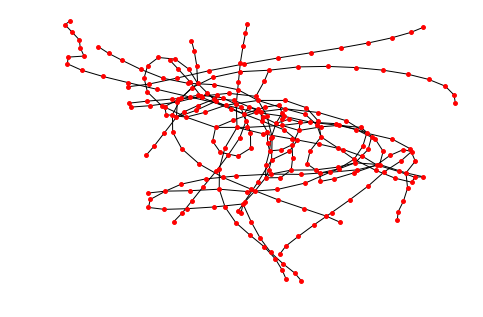

In [291]:
nx.draw(subway_graph, with_label=True, node_size=15)